Codes from UCI:<br>
**age**: age in years<br>
**sex**: sex (1 = male; 0 = female)<br>
**cp**: chest pain type<br>
-- Value 1: typical angina<br>
-- Value 2: atypical angina<br>
-- Value 3: non-anginal pain<br>
-- Value 4: asymptomatic<br>
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)<br>
**chol**: serum cholestoral in mg/dl<br>
**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
**restecg**: resting electrocardiographic results<br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
**thalach**: maximum heart rate achieved<br>
**exang**: exercise induced angina (1 = yes; 0 = no)<br>
**oldpeak**: = ST depression induced by exercise relative to rest<br>
**slope**: the slope of the peak exercise ST segment<br>
-- Value 1: upsloping<br>
-- Value 2: flat<br>
-- Value 3: downsloping<br>
**ca**: number of major vessels (0-3) colored by flourosopy<br>
**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
**target**: diagnosis of heart disease (angiographic disease status)<br>
-- Value 0: < 50% diameter narrowing<br>
-- Value 1: > 50% diameter narrowing<br>



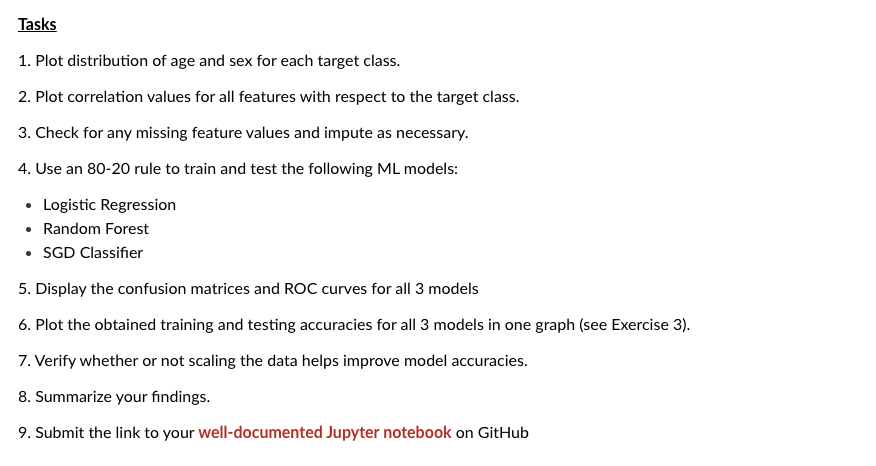

In [149]:
# Load in the required libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Read in the Heart dataset from github
url = 'https://raw.githubusercontent.com/jimgrasell/AML/master/Project03/Data/heart.csv'
df = pd.read_csv(url)
print(df.head())
print('Shape of the dataframe: ',df.shape)

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0     2.30      0   0     1       1
1   37    1   2       130   250    0  ...      0     3.50      0   0     2       1
2   41    0   1       130   204    0  ...      0     1.40      2   0     2       1
3   56    1   1       120   236    0  ...      0     0.80      2   0     2       1
4   57    0   0       120   354    0  ...      1     0.60      2   0     2       1

[5 rows x 14 columns]
Shape of the dataframe:  (303, 14)


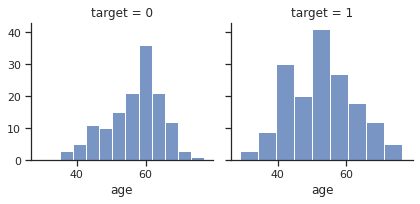

In [151]:
# Plot histogram for age by the target variable
g = sns.FacetGrid(df, col="target")
g.map(sns.histplot, "age")

Age is relatively normally distributed with no indication of outliers. The median age for those without heart disease is 60 while the median age for those with heart disease 50.

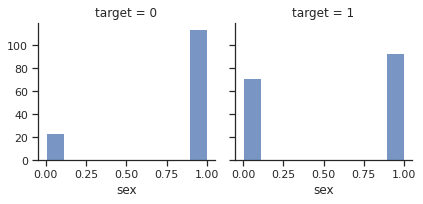

In [152]:
# Plot histogram for sex by the target variable
g = sns.FacetGrid(df, col="target")
g.map(sns.histplot, "sex")

In [153]:
# Correlations between the features (X) and the target.
correlations = df.corr()
print(correlations['target'])

age        -0.23
sex        -0.28
cp          0.43
trestbps   -0.14
chol       -0.09
fbs        -0.03
restecg     0.14
thalach     0.42
exang      -0.44
oldpeak    -0.43
slope       0.35
ca         -0.39
thal       -0.34
target      1.00
Name: target, dtype: float64


The correlations between the features range from low (fbs -0.03) to moderate (exang -0.44)

In [154]:
# Calculate and print the descriptive statistics for the numeric data in the dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


The descriptive statistics indicate that there are no missing data in the features or target.

In [155]:
# Splitting the data into a features data X and target data y
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])
print('Shape of the X dataframe: ',X.shape)
print('Shape of the y dataframe: ',y.shape)

Shape of the X dataframe:  (303, 13)
Shape of the y dataframe:  (303, 1)


In [156]:
# Split the data into training and test data files
from sklearn.model_selection import train_test_split

In [157]:
# 80% of the data put into the train data and 20% put into the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of the X_train dataframe: ',X_train.shape)
print('Shape of the y_train dataframe: ',y_train.shape)
print('Shape of the X_test dataframe: ',X_test.shape)
print('Shape of the y_test dataframe: ',y_test.shape)

Shape of the X_train dataframe:  (242, 13)
Shape of the y_train dataframe:  (242, 1)
Shape of the X_test dataframe:  (61, 13)
Shape of the y_test dataframe:  (61, 1)


In [158]:
# Use the MinMax Scaler to scale the features data X
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train)

In [159]:
# Scale X_train using MinMaxScaler and print to verify correct computation
X_train_mms = pd.DataFrame(mms.transform(X_train), columns=('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'))
print(X_train.head())
print(X_train_mms.head())

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
132   42    1   1       120   295  ...      0     0.00      2   0     2
202   58    1   0       150   270  ...      1     0.80      2   0     3
196   46    1   2       150   231  ...      0     3.60      1   0     2
75    55    0   1       135   250  ...      0     1.40      1   0     2
176   60    1   0       117   230  ...      1     1.40      2   2     3

[5 rows x 13 columns]
   age  sex   cp  trestbps  chol  ...  exang  oldpeak  slope   ca  thal
0 0.27 1.00 0.33      0.27  0.38  ...   0.00     0.00   1.00 0.00  0.67
1 0.60 1.00 0.00      0.57  0.32  ...   1.00     0.14   1.00 0.00  1.00
2 0.35 1.00 0.67      0.57  0.23  ...   0.00     0.64   0.50 0.00  0.67
3 0.54 0.00 0.33      0.42  0.27  ...   0.00     0.25   0.50 0.00  0.67
4 0.65 1.00 0.00      0.23  0.23  ...   1.00     0.25   1.00 0.50  1.00

[5 rows x 13 columns]


In [160]:
# Scale X_train using MinMaxScaler and print to verify correct computation
X_test_mms = pd.DataFrame(mms.transform(X_test), columns=('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'))
print(X_test.head())
print(X_test_mms.head())

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
179   57    1   0       150   276  ...      1     0.60      1   1     1
228   59    1   3       170   288  ...      0     0.20      1   0     3
111   57    1   2       150   126  ...      0     0.20      2   1     3
246   56    0   0       134   409  ...      1     1.90      1   2     3
60    71    0   2       110   265  ...      0     0.00      2   1     2

[5 rows x 13 columns]
   age  sex   cp  trestbps  chol  ...  exang  oldpeak  slope   ca  thal
0 0.58 1.00 0.00      0.57  0.33  ...   1.00     0.11   0.50 0.25  0.33
1 0.62 1.00 1.00      0.78  0.36  ...   0.00     0.04   0.50 0.00  1.00
2 0.58 1.00 0.67      0.57 -0.01  ...   0.00     0.04   1.00 0.25  1.00
3 0.56 0.00 0.00      0.41  0.64  ...   1.00     0.34   0.50 0.50  1.00
4 0.87 0.00 0.67      0.16  0.31  ...   0.00     0.00   1.00 0.25  0.67

[5 rows x 13 columns]


## Logistic Regression (Original - unscaled X)

Accuracy of Train Data:  0.8636363636363636
Accuracy of Test Data:  0.8852459016393442
[[ 87  22]
 [ 11 122]]


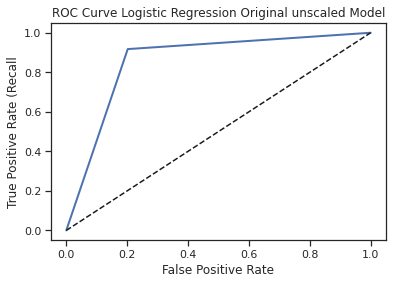

In [174]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train,y_train.values.ravel())

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

log_reg_train_accuracy = log_reg.score(X_train, y_train)
log_reg_test_accuracy = log_reg.score(X_test, y_test)

print('Accuracy of Train Data: ',log_reg_train_accuracy)
print('Accuracy of Test Data: ', log_reg_test_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.title('ROC Curve Logistic Regression Original unscaled Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')

plot_roc_curve(fpr, tpr)
plt.show()

## Logistic Regression (MinMax Scaled X)

Accuracy of Train MinMax Data:  0.8471074380165289
Accuracy of Test MinMax Data:  0.8524590163934426
[[ 85  24]
 [ 13 120]]


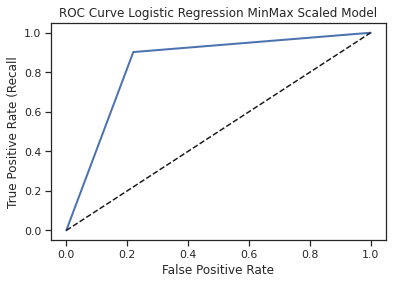

In [162]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_mms,y_train.values.ravel())

y_train_mms_predict = log_reg.predict(X_train_mms)
y_test_mms_predict = log_reg.predict(X_test_mms)

log_reg_train_mms_accuracy = log_reg.score(X_train_mms, y_train)
log_reg_test_mms_accuracy = log_reg.score(X_test_mms, y_test)

print('Accuracy of Train MinMax Data: ',log_reg_train_mms_accuracy)
print('Accuracy of Test MinMax Data: ', log_reg_test_mms_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_mms_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_mms_predict)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.title('ROC Curve Logistic Regression MinMax Scaled Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')

plot_roc_curve(fpr, tpr)
plt.show()

## Random Forest Classifier (Original unscaled X)

Accuracy of Train Data:  0.9710743801652892
Accuracy of Test Data:  0.8360655737704918
[[105   4]
 [  3 130]]


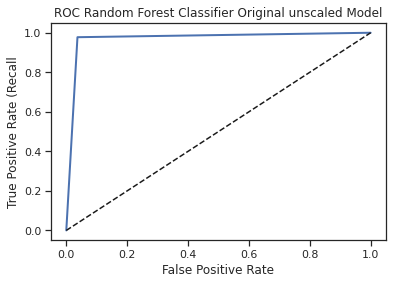

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 5, random_state = 0)

rf_clf.fit(X_train,y_train.values.ravel())

y_train_predict = rf_clf.predict(X_train)
y_test_predict = rf_clf.predict(X_test)

rf_clf_train_accuracy = rf_clf.score(X_train, y_train)
rf_clf_test_accuracy = rf_clf.score(X_test, y_test)

print('Accuracy of Train Data: ',rf_clf_train_accuracy)
print('Accuracy of Test Data: ', rf_clf_test_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.title('ROC Random Forest Classifier Original unscaled Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')

plot_roc_curve(fpr, tpr)
plt.show()

## Random Forest Classifier (MinMax Scaled X)

Accuracy of Train MinMax Data:  0.9710743801652892
Accuracy of Test MinMax Data:  0.8360655737704918
[[105   4]
 [  3 130]]


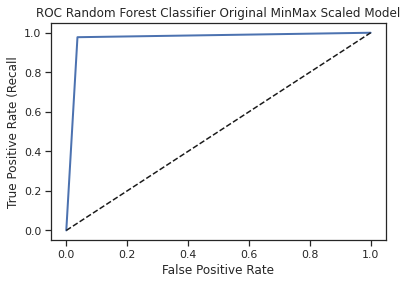

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 5, random_state = 0)

rf_clf.fit(X_train_mms,y_train.values.ravel())

y_train_predict = rf_clf.predict(X_train_mms)
y_test_predict = rf_clf.predict(X_test_mms)

rf_clf_train_mms_accuracy = rf_clf.score(X_train_mms, y_train)
rf_clf_test_mms_accuracy = rf_clf.score(X_test_mms, y_test)

print('Accuracy of Train MinMax Data: ',rf_clf_train_mms_accuracy)
print('Accuracy of Test MinMax Data: ', rf_clf_test_mms_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.title('ROC Random Forest Classifier Original MinMax Scaled Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')

plot_roc_curve(fpr, tpr)
plt.show()

## SGD Classifier (Original unscaled X)

Accuracy of Train Data:  0.5537190082644629
Accuracy of Test Data:  0.5409836065573771
[[  1 108]
 [  0 133]]


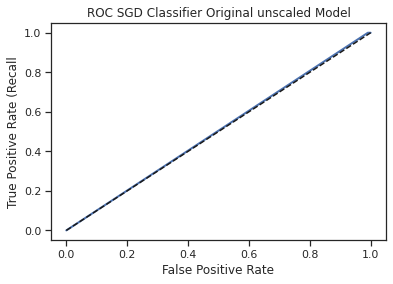

In [171]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=250, tol=1e-3)

sgd_clf.fit(X_train,y_train.values.ravel())

y_train_predict = sgd_clf.predict(X_train)
y_test_predict = sgd_clf.predict(X_test)

sgd_clf_train_accuracy = sgd_clf.score(X_train, y_train)
sgd_clf_test_accuracy = sgd_clf.score(X_test, y_test)

print('Accuracy of Train Data: ',sgd_clf_train_accuracy)
print('Accuracy of Test Data: ', sgd_clf_test_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.title('ROC SGD Classifier Original unscaled Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')

plot_roc_curve(fpr, tpr)
plt.show()

## SGD Classifier (MinMax Scaled X)

Accuracy of Train MinMax Data:  0.8471074380165289
Accuracy of Test MinMax Data:  0.8688524590163934
[[ 80  29]
 [  8 125]]


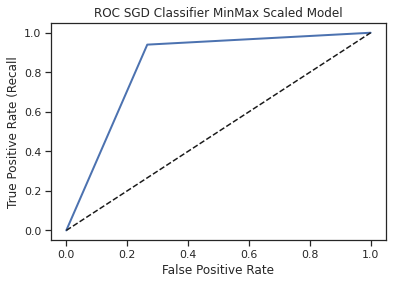

In [170]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=250, tol=1e-3)

sgd_clf.fit(X_train_mms,y_train.values.ravel())

y_train_predict = sgd_clf.predict(X_train_mms)
y_test_predict = sgd_clf.predict(X_test_mms)

sgd_clf_train_mms_accuracy = sgd_clf.score(X_train_mms, y_train)
sgd_clf_test_mms_accuracy = sgd_clf.score(X_test_mms, y_test)

print('Accuracy of Train MinMax Data: ',sgd_clf_train_mms_accuracy)
print('Accuracy of Test MinMax Data: ', sgd_clf_test_mms_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_predict))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.title('ROC SGD Classifier MinMax Scaled Model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall')

plot_roc_curve(fpr, tpr)
plt.show()

## Compare Model Accuracy of Original Unscaled and MinMax Scaled Features

In [167]:
# Logistic Regression
print('Accuracy of Train Data: ',log_reg_train_accuracy)
print('Accuracy of Test Data: ', log_reg_test_accuracy)
print('Accuracy of Train MinMax Data: ',log_reg_train_mms_accuracy)
print('Accuracy of Test MinMax Data: ', log_reg_test_mms_accuracy)

Accuracy of Train Data:  0.8636363636363636
Accuracy of Test Data:  0.8852459016393442
Accuracy of Train MinMax Data:  0.8471074380165289
Accuracy of Test MinMax Data:  0.8524590163934426


Logistic Regression: The original unscaled features model performed miniminly better that the MinMaxScaled features model.

In [168]:
# Random Forest Classifier
print('Accuracy of Train Data: ',rf_clf_train_accuracy)
print('Accuracy of Test Data: ', rf_clf_test_accuracy)
print('Accuracy of Train MinMax Data: ',rf_clf_train_mms_accuracy)
print('Accuracy of Test MinMax Data: ', rf_clf_test_mms_accuracy)

Accuracy of Train Data:  0.9710743801652892
Accuracy of Test Data:  0.8360655737704918
Accuracy of Train MinMax Data:  0.9710743801652892
Accuracy of Test MinMax Data:  0.8360655737704918


Random Forest Classifier: The original and MinMaxScaled features models performed equally.

In [172]:
# SGD Classifier
print('Accuracy of Train Data: ',sgd_clf_train_accuracy)
print('Accuracy of Test Data: ', sgd_clf_test_accuracy)
print('Accuracy of Train MinMax Data: ',sgd_clf_train_mms_accuracy)
print('Accuracy of Test MinMax Data: ', sgd_clf_test_mms_accuracy)

Accuracy of Train Data:  0.5537190082644629
Accuracy of Test Data:  0.5409836065573771
Accuracy of Train MinMax Data:  0.8471074380165289
Accuracy of Test MinMax Data:  0.8688524590163934


SGD Classifier: The MinMaxScaled features model significantly out-performs the original unscaled features model.

In [183]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_reg, X_train, y_train.values.ravel(), cv=10) # Logistic Regression Unscaled
log_mms_scores = cross_val_score(log_reg, X_train_mms, y_train.values.ravel(), cv=10) # Logistic Regression MinMaxScaled

rf_scores = cross_val_score(rf_clf, X_train, y_train.values.ravel(), cv=10) # Random Forest Classifier Unscaled
rf_mms_scores = cross_val_score(rf_clf, X_train_mms, y_train.values.ravel(), cv=10) # Random Forest Classifier MinMaxScaled

sgd_scores = cross_val_score(sgd_clf, X_train, y_train.values.ravel(), cv=10) # SGD Classifier Unscaled
sgd_mms_scores = cross_val_score(sgd_clf, X_train_mms, y_train.values.ravel(), cv=10) # SGD Classifier MinMaxScaled


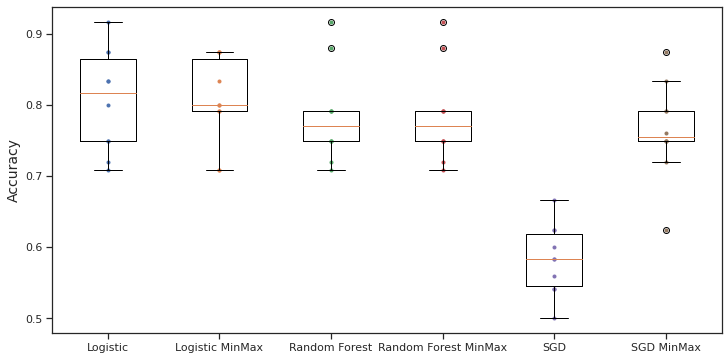

In [194]:
plt.figure(figsize=(12, 6))
plt.plot([1]*10, log_scores, ".")
plt.plot([2]*10, log_mms_scores, ".")
plt.plot([3]*10, rf_scores, ".")
plt.plot([4]*10, rf_mms_scores, ".")
plt.plot([5]*10, sgd_scores, ".")
plt.plot([6]*10, sgd_mms_scores, ".")
plt.boxplot([log_scores, log_mms_scores, rf_scores, rf_mms_scores, sgd_scores, sgd_mms_scores], labels=("Logistic","Logistic MinMax","Random Forest","Random Forest MinMax","SGD","SGD MinMax"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## Findings Summary
1. The logistic (unscaled features) model produced the highest average accuracy.
2. The logistic (MinMax scaled features) model produced slightly lower average accuracy compared to the unscaled model, but the variance of accuracy estimates were smaller for the scaled model.
3. There does not seem to be any difference in accuracy between scaled and unscaled models when using Random Forest. The average accuracy of these models were slightly less than the logistic regression models.
4. The SGD Classifier was very sensitive to feature scaling. The MinMax scaled model performed significantly bellter than the unscaled model and on-par with the Random Forest Models. The unscaled SGD Classifier model performed poorly with an average accuracy less than 0.6.